In this tutorial, we're going to study the TOI-216 system, composed of two planets near 2:1 resonance (Kipping et al. 2019; Dawson et al. 2019). This is an important example because TESS+follow-up observations sparsely sample the super-period, likely leading to multimodalities in the posteriors. We will use the transit times from Dawson et al. 2019 as they contain three extra data points from follow-up observations that we may use.

First, we'll set everything up and import ttvnest:

In [1]:
%matplotlib inline
import numpy as np
import ttvnest
import scipy
import time
import multiprocess
from ttvnest.constants import *

Now, let's download the data for Kepler-29 (KOI-738) from the Holczer et al. (2016) catalog:

In [ ]:
nplanets = 2
filename = 'toi_216.dat'
data, errs = ttvnest.load_data.get_data_from_file(nplanets, filename)

Next, we need to define the prior transform. Nested sampling methods typically sample on the unit cube (from 0 to 1 in all dimensions), so we need a way to map that into our preferred prior space. Eventually, I'll try to abstract the prior transform away from the user.

In [3]:
#defining the prior transform

def prior_transform(u):
	x = np.array(u) #copy u
	#planet 1
	x[0] = 500.*u[0] #uniform on [0, 10) earth masses
	x[1] = scipy.stats.norm.ppf(u[1], 17.09, 0.01)  #gaussian around 10.33585 with a width of 0.01
	x[2] = scipy.stats.norm.ppf(u[2], 0, 0.1) #gaussian around 0 with a width of 0.1
	x[3] = scipy.stats.norm.ppf(u[3], 0, 0.1) #gaussian around 0 with a width of 0.1
	x[4] = (u[4] % 1.) * 360. #periodic on [0, 360) degrees
	#planet 2
	x[5] = 500.*u[5] #uniform on [0, 10) earth masses
	x[6] = scipy.stats.norm.ppf(u[6], 34.56, 0.01) #gaussian around 13.29292 with a width of 0.01
	x[7] = scipy.stats.norm.ppf(u[7], 0, 0.1) #gaussian around 0 with a width of 0.1
	x[8] = scipy.stats.norm.ppf(u[8], 0, 0.1) #gaussian around 0 with a width of 0.1
	x[9] = (u[9] % 1.) * 360. #periodic on [0, 360) degrees
	return x

Finally, we sample the posteriors!

In [4]:
%time results = ttvnest.retrieval.retrieve(nplanets, prior_transform, data, errs, start_time = ttess, sim_length = 2000)

Running dynesty with the rwalk sampler and multi bounding...


iter: 15179 | batch: 0 | bound: 87 | nc: 25 | ncall: 350198 | eff(%):  4.322 | loglstar:   -inf < -9327.090 <    inf | logz: -9349.861 +/-  0.213 | dlogz: 9173.202 >  0.010                          /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:237: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 60026 | batch: 3 | bound: 417 | nc: 25 | ncall: 1467223 | eff(%):  4.091 | loglstar: 16.455 < 24.640 < 22.183 | logz: -21.191 +/-  0.284 | stop:  0.959                                         


CPU times: user 6h 47min 19s, sys: 2min 19s, total: 6h 49min 38s
Wall time: 6h 52min 4s


Let's now see a summary of our results:

In [5]:
ttvnest.retrieval.posterior_summary(results)

Summary: 
$M_1/M_\star$: $24.163007644328495^{+1.6976653682731317}_{-1.8013649875224154}$
$P_1\ [\mathrm{days}]$: $17.063298300264606^{+0.0014292890001392777}_{-0.001520288104686074}$
$e_1\cos(\omega_1)$: $-0.018710167506742904^{+0.004433843327441699}_{-0.004744919552537561}$
$e_1\sin(\omega_1)$: $0.06383810394252462^{+0.002136447260478333}_{-0.002378403009893705}$
$\mathcal{M}_1\ [^\circ]$: $77.08323114644904^{+3.398892300900627}_{-3.9709854806977063}$
$M_2/M_\star$: $222.2799244376693^{+6.152548660558608}_{-5.197587558837057}$
$P_2\ [\mathrm{days}]$: $34.556724733364256^{+0.0003936467885310435}_{-0.0004261149294748634}$
$e_2\cos(\omega_2)$: $-0.035481503587162434^{+0.002487977122007226}_{-0.0034220156969473683}$
$e_2\sin(\omega_2)$: $0.06402963498709244^{+0.0039949838683083355}_{-0.0035310498334471044}$
$\mathcal{M}_2\ [^\circ]$: $147.22880964670605^{+1.508546163650351}_{-1.0232422634844056}$


And let's plot the result, as well as the corner plot, a summary of the run, and the dynesty trace plot.

<Figure size 1440x1440 with 0 Axes>

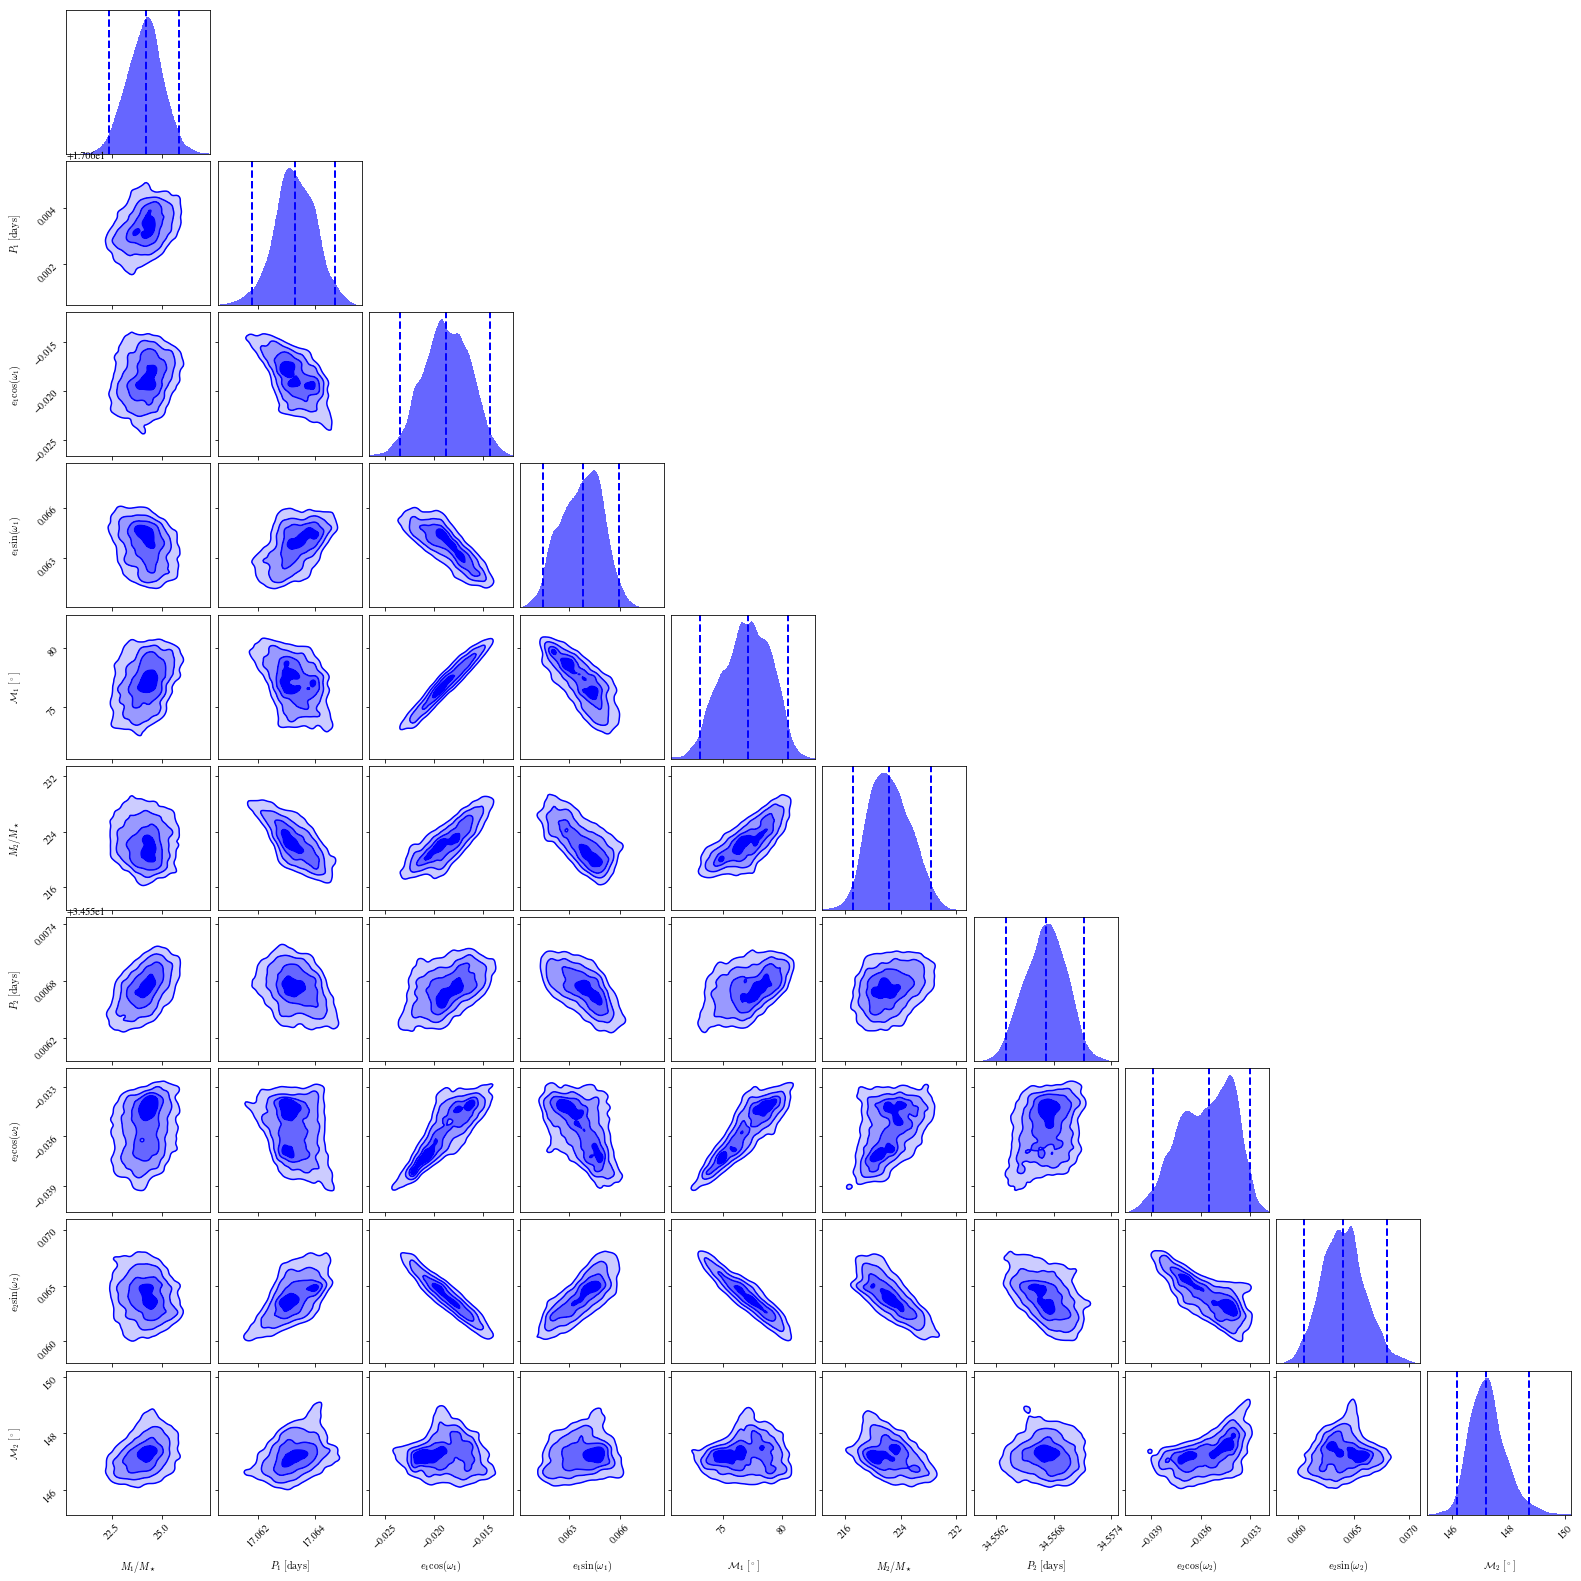

<Figure size 1440x1440 with 0 Axes>

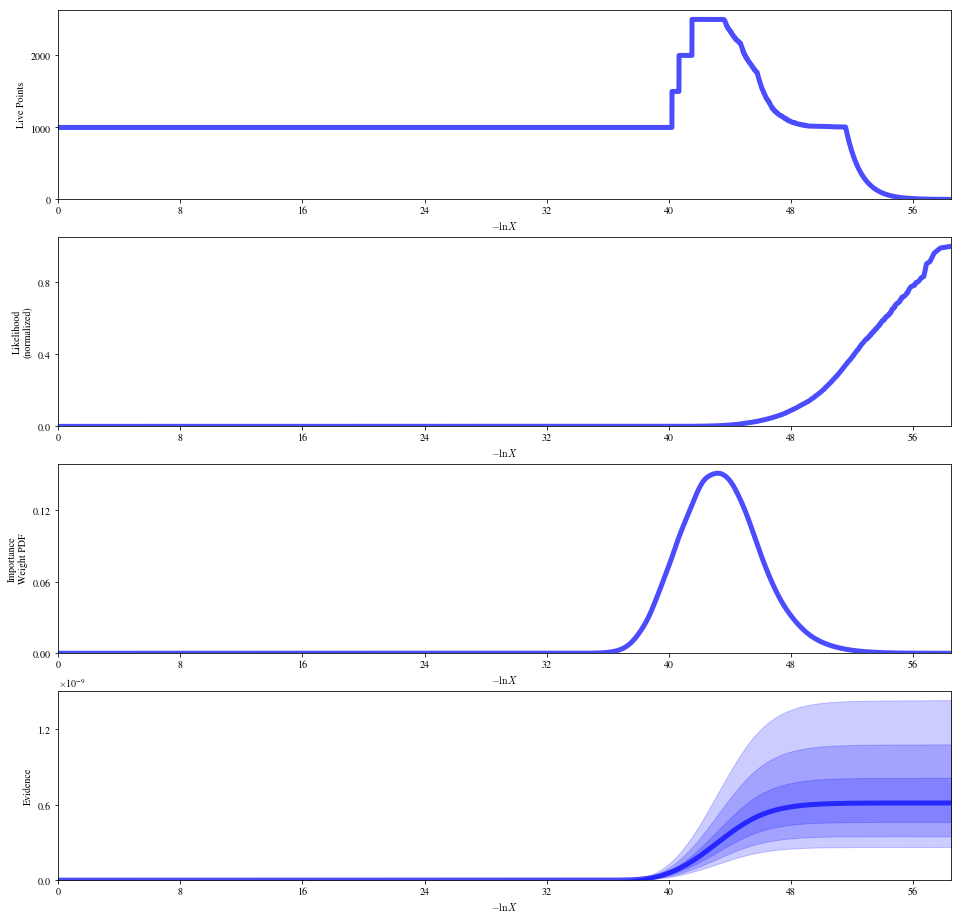

<Figure size 1440x1440 with 0 Axes>

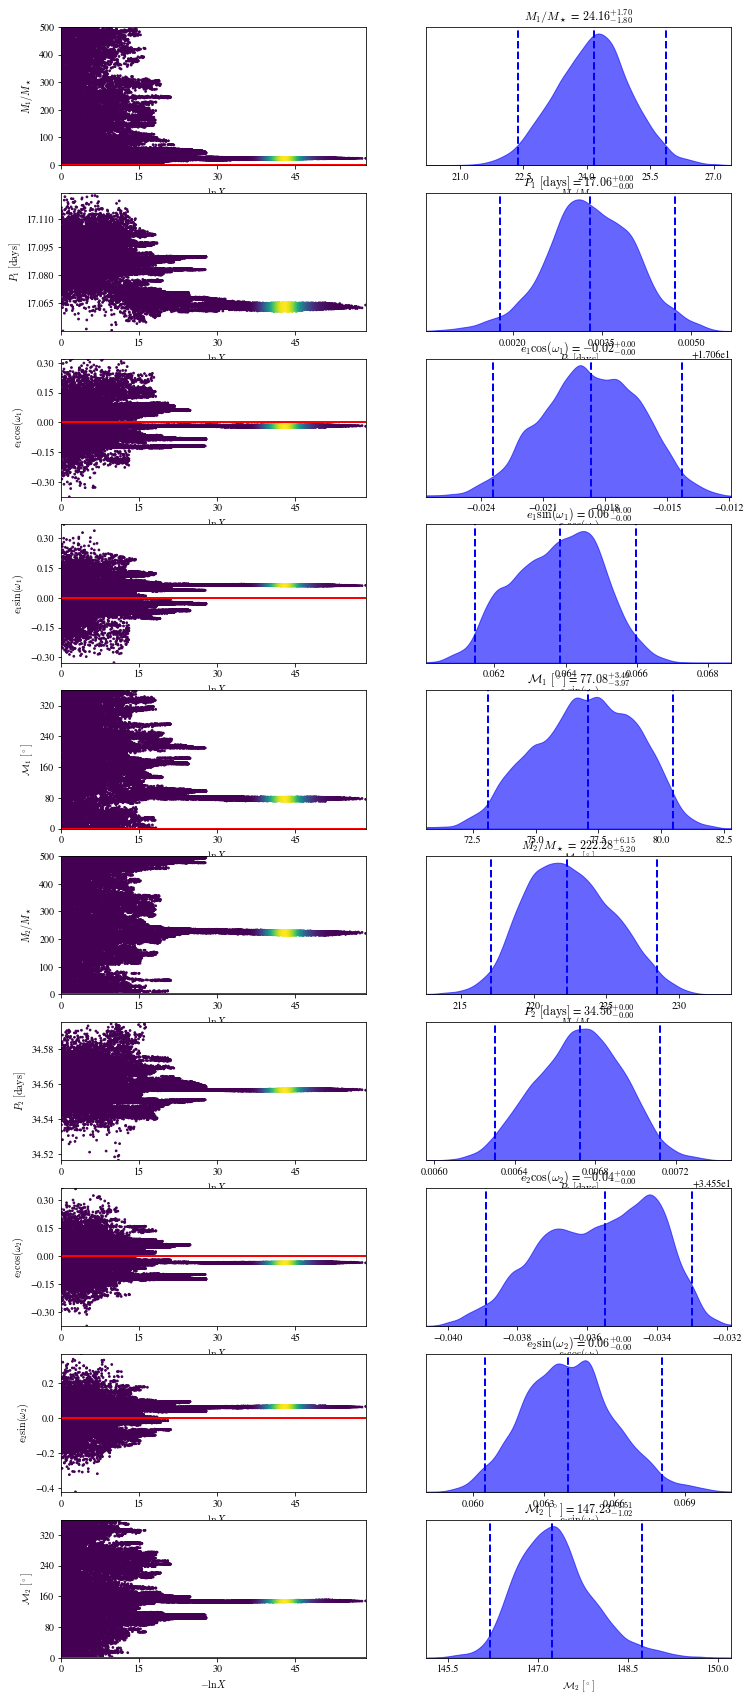

In [9]:
#ttvnest.plot_utils.plot_results(results, data, errs, start_time = ttess)
ttvnest.plot_utils.dynesty_plots(results, nplanets)

Let's make sure to save our results! The results will be saved in a file called 'results.p' by default, but you can change that with the "outname" keyword for save_results.

In [7]:
ttvnest.io_utils.save_results(results, outname = 'results_toi216.p')

'results_toi216.p'